In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Results of OpenMP Implementation 

##### Without Display

In [2]:
openmp_performance_data = {
    200: [1.09521, 0.507500, 0.270088, 0.137024, 0.256982, 0.264553],
    2000: [62.476823, 34.182365, 22.258970, 16.028924, 17.277525, 18.074120],
    4000: [245.380726, 132.257201, 93.053196, 49.959719, 51.868397, 53.058985],
    6000: [584.275841, 311.595247, 167.381718, 85.604737, 91.543897, 98.596086],
    8000: [1128.789000, 566.027628, 292.635502, 199.527602, 215.725352, 218.083407],
    10000: [2388.513655, 1123.615889, 571.797300, 297.915821, 301.831828, 312.963462]
}
threads = [1, 2, 4, 8, 16, 32]
openmp_data_dict = {
    "Thread Count": [],
    "Input Size": [],
    "Running Time (sec)": []
}
for size in openmp_performance_data:
    for thread_count, time in zip(threads, openmp_performance_data[size]):
        openmp_data_dict["Thread Count"].append(thread_count)
        openmp_data_dict["Input Size"].append(size)
        openmp_data_dict["Running Time (sec)"].append(time)
openmp_df = pd.DataFrame(openmp_data_dict)
openmp_compact_df = openmp_df.pivot(index="Input Size", columns="Thread Count", values="Running Time (sec)")
openmp_compact_df

Thread Count,1,2,4,8,16,32
Input Size,,,,,,
200,1.095210,0.507500,0.270088,0.137024,0.256982,0.264553
2000,62.476823,34.182365,22.258970,16.028924,17.277525,18.074120
4000,245.380726,132.257201,93.053196,49.959719,51.868397,53.058985
6000,584.275841,311.595247,167.381718,85.604737,91.543897,98.596086
8000,1128.789000,566.027628,292.635502,199.527602,215.725352,218.083407
10000,2388.513655,1123.615889,571.797300,297.915821,301.831828,312.963462


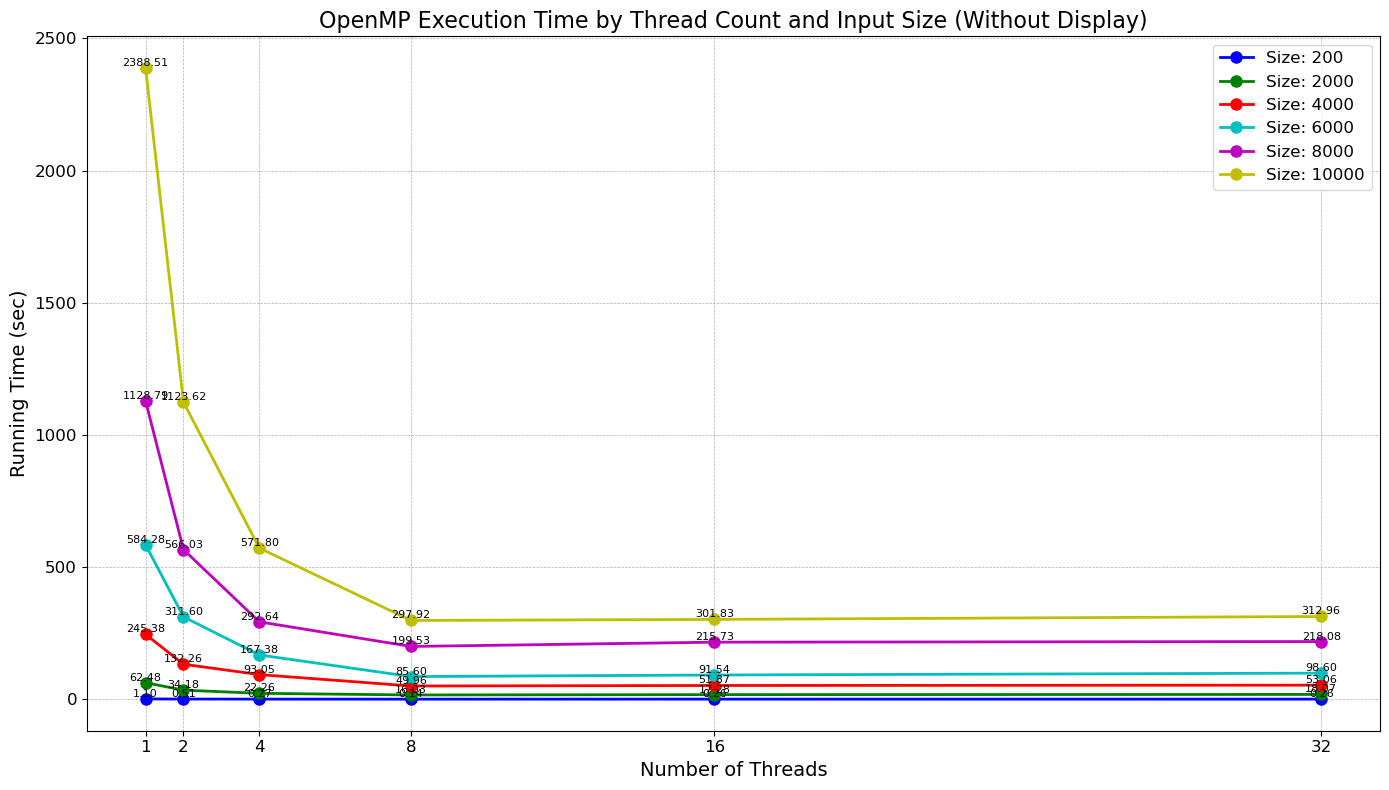

In [3]:
import matplotlib.pyplot as plt
import numpy as np
sizes = [200, 2000, 4000, 6000, 8000, 10000]
threads = [1, 2, 4, 8, 16, 32]
performance_data = {
    200: [1.09521, 0.507500, 0.270088, 0.137024, 0.256982, 0.264553],
    2000: [62.476823, 34.182365, 22.258970, 16.028924, 17.277525, 18.074120],
    4000: [245.380726, 132.257201, 93.053196, 49.959719, 51.868397, 53.058985],
    6000: [584.275841, 311.595247, 167.381718, 85.604737, 91.543897, 98.596086],
    8000: [1128.789000, 566.027628, 292.635502, 199.527602, 215.725352, 218.083407],
    10000: [2388.513655, 1123.615889, 571.797300, 297.915821, 301.831828, 312.963462]
}
colors = ['b', 'g', 'r', 'c', 'm', 'y']
plt.figure(figsize=(14, 8))
for i, size in enumerate(sizes):
    times = performance_data[size]
    plt.plot(threads, times, marker='o', linestyle='-', linewidth=2, markersize=8, color=colors[i], label=f'Size: {size}')
    for j, time in enumerate(times):
        plt.text(threads[j], time, f'{time:.2f}', fontsize=8, ha='center', va='bottom')
plt.title('OpenMP Execution Time by Thread Count and Input Size (Without Display)', fontsize=16)
plt.xlabel('Number of Threads', fontsize=14)
plt.ylabel('Running Time (sec)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(threads, fontsize=12)
custom_ticks = [0, 500] + list(range(1000, 2501, 500))
plt.yticks(custom_ticks, [str(tick) for tick in custom_ticks], fontsize=12)

plt.tight_layout()

# Setting background to white and adding border
ax = plt.gca()
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.show()

##### With Display

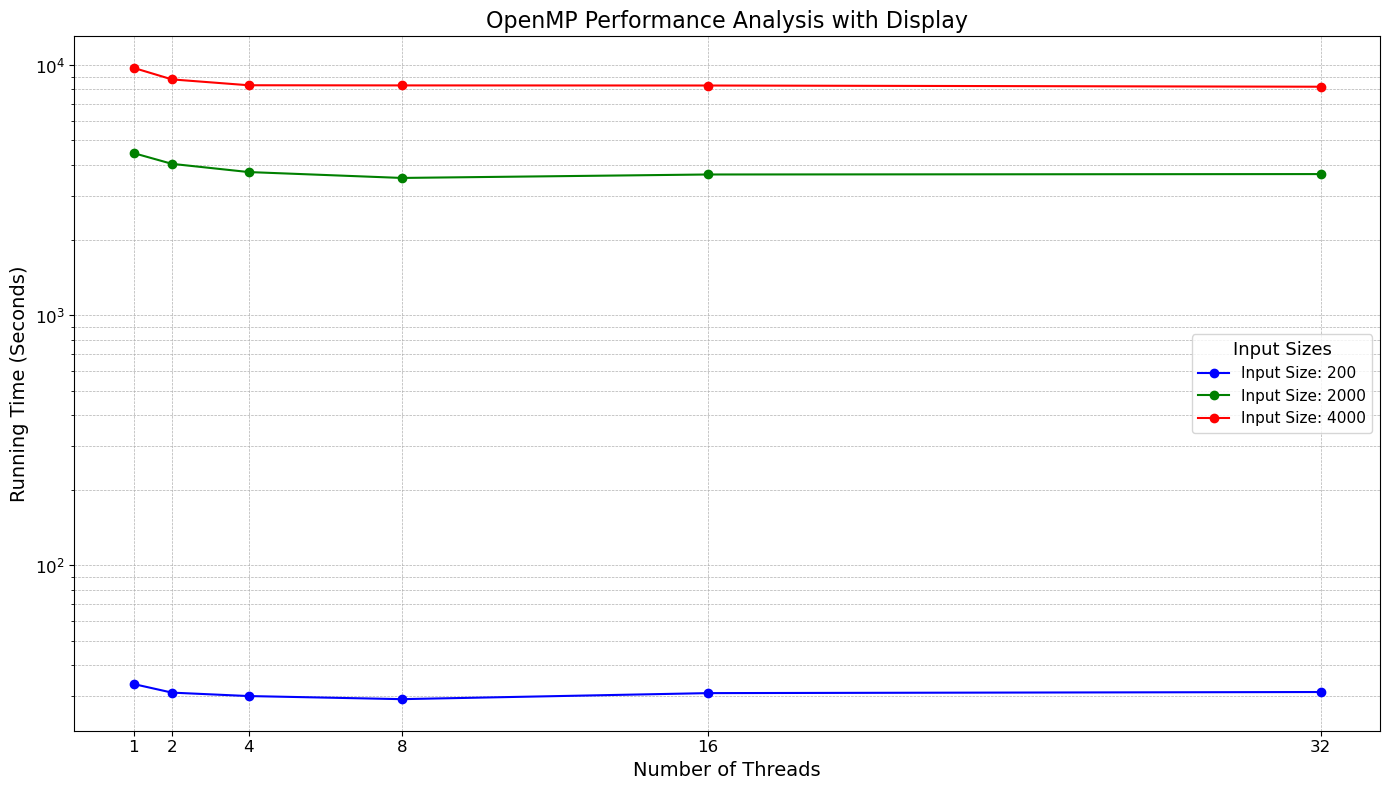

In [4]:
display_data = {
    "Input Size": [200, 200, 200, 200, 200, 200, 2000, 2000, 2000, 2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000],
    "Threads": [1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32],
    "Running Time (sec)": [33.554400, 31.009132, 30.044685, 29.197267, 30.867721, 31.182395, 4450.509178, 4031.874142, 3738.829616, 3541.457182, 3655.874142, 3669.725689, 9753.167267, 8773.175361, 8313.210781, 8301.126788, 8293.015678, 8201.235553]
}

df_display = pd.DataFrame(display_data)

plt.figure(figsize=(14, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_index = 0

for input_size in df_display["Input Size"].unique():
    df_filtered = df_display[df_display["Input Size"] == input_size]
    plt.plot(df_filtered["Threads"], df_filtered["Running Time (sec)"], marker='o', label=f"Input Size: {input_size}", color=colors[color_index % len(colors)])
    color_index += 1

plt.xlabel("Number of Threads", fontsize=14)
plt.ylabel("Running Time (Seconds)", fontsize=14)
plt.title("OpenMP Performance Analysis with Display", fontsize=16)
plt.legend(title="Input Sizes", title_fontsize='13', fontsize='11')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.xticks(df_display["Threads"].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale("log") 
plt.tight_layout()
plt.show()


### Results of Pthread Implementation 

In [5]:
pthread_performance_data = {
    200: [0.918148, 0.497109, 0.287071, 0.127035, 0.135927, 0.1565075],
    2000: [76.658001, 52.091835, 23.820402, 15.607831, 15.786297, 15.429960],
    4000: [265.695111, 128.727205, 72.162929, 35.478713, 37.178498, 37.923513],
    6000: [704.683263, 338.966566, 199.073182, 88.895731, 89.067306, 90.561788],
    8000: [890.216624, 469.086369, 275.580802, 179.615751, 181.857672, 181.996841],
    10000: [1540.454639, 793.203419, 479.636168, 277.738412, 278.346904, 281.720238]
}
threads = [1, 2, 4, 8, 16, 32]
data_dict = {
    "Thread Count": [],
    "Input Size": [],
    "Running Time (sec)": []
}
for size in pthread_performance_data:
    for thread_count, time in zip(threads, pthread_performance_data[size]):
        data_dict["Thread Count"].append(thread_count)
        data_dict["Input Size"].append(size)
        data_dict["Running Time (sec)"].append(time)       
pthread_df = pd.DataFrame(data_dict)
pthread_compact_df = pthread_df.pivot(index="Input Size", columns="Thread Count", values="Running Time (sec)")
pthread_compact_df.head() 

Thread Count,1,2,4,8,16,32
Input Size,,,,,,
200,0.918148,0.497109,0.287071,0.127035,0.135927,0.156507
2000,76.658001,52.091835,23.820402,15.607831,15.786297,15.429960
4000,265.695111,128.727205,72.162929,35.478713,37.178498,37.923513
6000,704.683263,338.966566,199.073182,88.895731,89.067306,90.561788
8000,890.216624,469.086369,275.580802,179.615751,181.857672,181.996841


##### Without Display

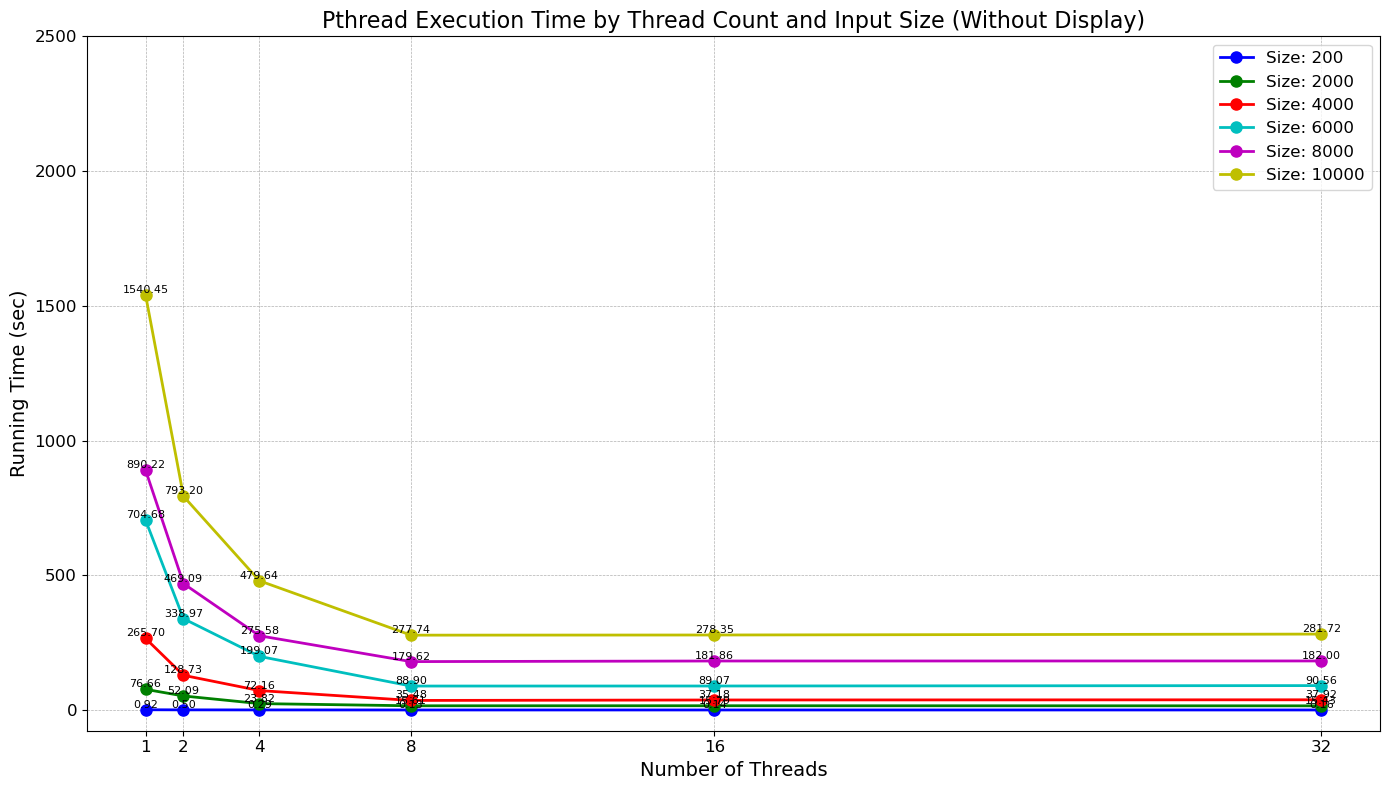

In [6]:
pthread_performance_data = {
    200: [0.918148, 0.497109, 0.287071, 0.127035, 0.135927, 0.1565075],
    2000: [76.658001, 52.091835, 23.820402, 15.607831, 15.786297, 15.429960],
    4000: [265.695111, 128.727205, 72.162929, 35.478713, 37.178498, 37.923513],
    6000: [704.683263, 338.966566, 199.073182, 88.895731, 89.067306, 90.561788],
    8000: [890.216624, 469.086369, 275.580802, 179.615751, 181.857672, 181.996841],
    10000: [1540.454639, 793.203419, 479.636168, 277.738412, 278.346904, 281.720238]
}
plt.figure(figsize=(14, 8))
for i, size in enumerate(sizes):
    times = pthread_performance_data[size]
    plt.plot(threads, times, marker='o', linestyle='-', linewidth=2, markersize=8, color=colors[i], label=f'Size: {size}')
    for j, time in enumerate(times):
        plt.text(threads[j], time, f'{time:.2f}', fontsize=8, ha='center', va='bottom')
plt.title('Pthread Execution Time by Thread Count and Input Size (Without Display)', fontsize=16)
plt.xlabel('Number of Threads', fontsize=14)
plt.ylabel('Running Time (sec)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(threads, fontsize=12)
custom_ticks = [0, 500] + list(range(1000, 2501, 500))
plt.yticks(custom_ticks, [str(tick) for tick in custom_ticks], fontsize=12)
plt.tight_layout()
ax = plt.gca()
ax.set_facecolor('white')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
plt.show()

##### With Display

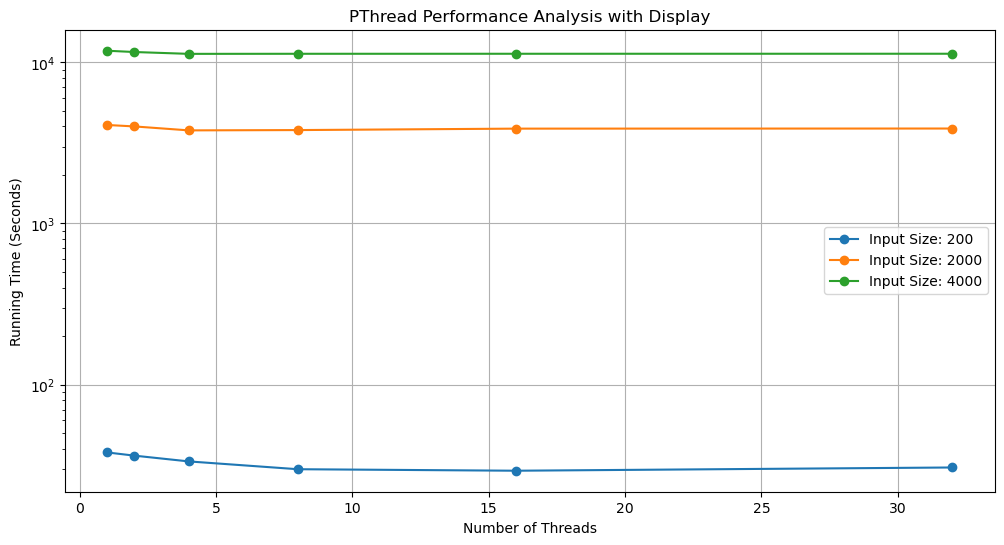

In [9]:
pthread_data = {
    "Input Size": [200, 200, 200, 200, 200, 200, 2000, 2000, 2000, 2000, 2000, 2000, 4000, 4000, 4000, 4000, 4000, 4000],
    "Threads": [1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32, 1, 2, 4, 8, 16, 32],
    "Running Time (sec)": [37.975243, 36.271445, 33.393239, 29.869229, 29.234513, 30.620294, 4080.854901, 3997.169017, 3777.417822, 3793.744058, 3872.744058, 3878.744058, 11784.854901, 11570.169017, 11268.364724, 11280.895423, 11283.934794, 11287.358348]
}

pthread_df = pd.DataFrame(pthread_data)


plt.figure(figsize=(12, 6))

for input_size in pthread_df["Input Size"].unique():
    df_filtered = pthread_df[pthread_df["Input Size"] == input_size]
    plt.plot(df_filtered["Threads"], df_filtered["Running Time (sec)"], marker='o', label=f"Input Size: {input_size}")

plt.xlabel("Number of Threads")
plt.ylabel("Running Time (Seconds)")
plt.title("PThread Performance Analysis with Display")
plt.legend()
plt.grid(True)
plt.yscale("log") 
plt.show()
